This package implements the basic machinery for decorrelated backpropagation.

In [22]:
import torch
from decorrelation import lower_triangular_correlation, mean_correlation, DecorrelationPatch2d, DecorrelationFC
import matplotlib.pyplot as plt

We start by showing effective decorrelation of correlated input

iteration 0; average off-diagonal correlation: 0.942495
iteration 1; average off-diagonal correlation: 0.057130
iteration 2; average off-diagonal correlation: 0.052131
iteration 3; average off-diagonal correlation: 0.047969
iteration 4; average off-diagonal correlation: 0.044446
iteration 5; average off-diagonal correlation: 0.041424
iteration 6; average off-diagonal correlation: 0.038802
iteration 7; average off-diagonal correlation: 0.036503
iteration 8; average off-diagonal correlation: 0.034471
iteration 9; average off-diagonal correlation: 0.032661
iteration 10; average off-diagonal correlation: 0.031038
iteration 11; average off-diagonal correlation: 0.029575
iteration 12; average off-diagonal correlation: 0.028249
iteration 13; average off-diagonal correlation: 0.027040
iteration 14; average off-diagonal correlation: 0.025935
iteration 15; average off-diagonal correlation: 0.024919
iteration 16; average off-diagonal correlation: 0.023984
iteration 17; average off-diagonal correl

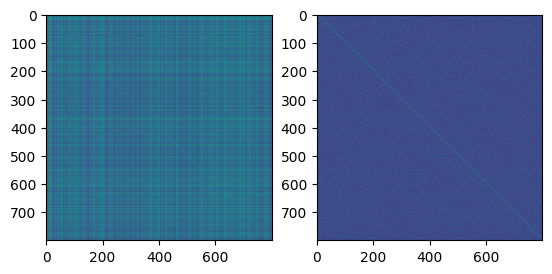

In [24]:
# generate [N, M] correlated input
num_examples=100
num_features=800
d = torch.distributions.MultivariateNormal(torch.zeros(num_features), 0.1 * torch.eye(num_features) + 0.9 * torch.ones((num_features, num_features)))
x = d.sample((num_examples,))

# create a fully connected decorrelator
model = DecorrelationFC(num_features)

# correlation matrix before training
C1 = model.correlation(model.forward(x))

# train decorrelator
for i in range(20):
    y = model.forward(x)
    model.update()
    model.R -= 1e-3 * model.R.grad
    print(f'iteration {i}; average off-diagonal correlation: {mean_correlation([model]).numpy():3f}')

# correlation matrix after training
C2 = model.correlation(model.forward(x))

plt.subplot(1,2,1)
plt.imshow(C1)
plt.subplot(1,2,2)
plt.imshow(C2);

Decorrelation of correlated input represented in convolutional [N, C, H, W] form

iteration 0; average patchwise off-diagonal correlation: 0.823891
iteration 1; average patchwise off-diagonal correlation: 0.801260
iteration 2; average patchwise off-diagonal correlation: 0.779894
iteration 3; average patchwise off-diagonal correlation: 0.759690
iteration 4; average patchwise off-diagonal correlation: 0.740555
iteration 5; average patchwise off-diagonal correlation: 0.722405
iteration 6; average patchwise off-diagonal correlation: 0.705167
iteration 7; average patchwise off-diagonal correlation: 0.688772
iteration 8; average patchwise off-diagonal correlation: 0.673161
iteration 9; average patchwise off-diagonal correlation: 0.658277
iteration 10; average patchwise off-diagonal correlation: 0.644071
iteration 11; average patchwise off-diagonal correlation: 0.630498
iteration 12; average patchwise off-diagonal correlation: 0.617515
iteration 13; average patchwise off-diagonal correlation: 0.605086
iteration 14; average patchwise off-diagonal correlation: 0.593175
itera

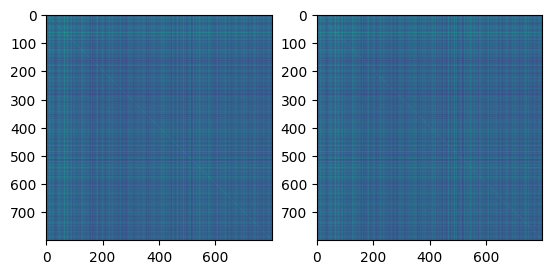

KeyboardInterrupt: 

In [ ]:
# generate [N, M] correlated input
num_examples=100
num_channels=2
height=20
width=20
num_features=num_channels*height*width
kernel_size=(3,3)

d = torch.distributions.MultivariateNormal(torch.zeros(num_features), 0.1 * torch.eye(num_features) + 0.9 * torch.ones((num_features, num_features)))
x = d.sample((num_examples,))

# transform to [N, C, H, W] correlated input
x = x.reshape(num_examples,num_channels,height,width)

model = DecorrelationPatch2d(2, kernel_size=kernel_size)

# correlation matrix before training
C1 = DecorrelationFC.correlation(model.forward(x).view(num_examples,-1))

# train decorrelator
for i in range(30):
    y = model.forward(x)
    model.update()
    model.R -= 1e-2 * model.R.grad
    print(f'iteration {i}; average patchwise off-diagonal correlation: {mean_correlation([model]).numpy():3f}')

# correlation matrix after training
C2 = DecorrelationFC.correlation(model.forward(x).view(num_examples,-1))

plt.subplot(1,2,1)
plt.imshow(C1)
plt.subplot(1,2,2)
plt.imshow(C2);

# plt.figure()
# for i in range(100):
#     y = model.forward(x)
#     model.update()
#     model.R -= 1e-2 * model.R.grad
#     # print(mean_correlation([model]).numpy()) # mean correlation over batches and patches
#     plt.subplot(10,10,i+1)
#     plt.imshow(model.correlation(model.output))
#     print(lower_triangular_correlation(DecorrelationFC.correlation(model.flatten(model.output))).numpy()) # mean correlation of the whole feature map
# plt.savefig("debug.png")